# Loop 70 Analysis: Submission Status and Strategy Review

## Key Questions:
1. What is the current submission status?
2. Why have 10 consecutive submissions failed?
3. What is the CV-LB relationship?
4. What strategies can reach the target?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Submission history
submissions = [
    {'exp': 'exp_000', 'cv': 0.011081, 'lb': 0.09816},
    {'exp': 'exp_001', 'cv': 0.012297, 'lb': 0.10649},
    {'exp': 'exp_003', 'cv': 0.010501, 'lb': 0.09719},
    {'exp': 'exp_005', 'cv': 0.01043, 'lb': 0.09691},
    {'exp': 'exp_006', 'cv': 0.009749, 'lb': 0.09457},
    {'exp': 'exp_007', 'cv': 0.009262, 'lb': 0.09316},
    {'exp': 'exp_009', 'cv': 0.009192, 'lb': 0.09364},
    {'exp': 'exp_012', 'cv': 0.009004, 'lb': 0.09134},
    {'exp': 'exp_024', 'cv': 0.008689, 'lb': 0.08929},
    {'exp': 'exp_026', 'cv': 0.008465, 'lb': 0.08875},
    {'exp': 'exp_030', 'cv': 0.008298, 'lb': 0.08772},
    {'exp': 'exp_035', 'cv': 0.009825, 'lb': 0.09696},
]

df = pd.DataFrame(submissions)
print('=== SUCCESSFUL SUBMISSIONS ===')
print(df.to_string(index=False))
print(f'\nTotal successful submissions: {len(df)}')
print(f'Best CV: {df["cv"].min():.6f} ({df.loc[df["cv"].idxmin(), "exp"]})')
print(f'Best LB: {df["lb"].min():.6f} ({df.loc[df["lb"].idxmin(), "exp"]})')

=== SUCCESSFUL SUBMISSIONS ===
    exp       cv      lb
exp_000 0.011081 0.09816
exp_001 0.012297 0.10649
exp_003 0.010501 0.09719
exp_005 0.010430 0.09691
exp_006 0.009749 0.09457
exp_007 0.009262 0.09316
exp_009 0.009192 0.09364
exp_012 0.009004 0.09134
exp_024 0.008689 0.08929
exp_026 0.008465 0.08875
exp_030 0.008298 0.08772
exp_035 0.009825 0.09696

Total successful submissions: 12
Best CV: 0.008298 (exp_030)
Best LB: 0.087720 (exp_030)


In [2]:
# CV-LB Linear Regression
X = df['cv'].values.reshape(-1, 1)
y = df['lb'].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

print('=== CV-LB RELATIONSHIP ===')
print(f'Linear fit: LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R² = {r2:.4f}')
print(f'\nInterpretation:')
print(f'  - Slope: {slope:.2f}x multiplier on CV')
print(f'  - Intercept: {intercept:.4f} (structural gap)')
print(f'\nTarget Analysis:')
print(f'  - Target LB: 0.0347')
print(f'  - Intercept: {intercept:.4f}')
print(f'  - Gap: {intercept - 0.0347:.4f}')
if intercept > 0.0347:
    print(f'  - CRITICAL: Intercept > Target!')
    print(f'  - Required CV: (0.0347 - {intercept:.4f}) / {slope:.2f} = {(0.0347 - intercept) / slope:.6f}')
    print(f'  - This is NEGATIVE, meaning standard CV optimization CANNOT reach target!')

=== CV-LB RELATIONSHIP ===
Linear fit: LB = 4.2876 * CV + 0.0528
R² = 0.9523

Interpretation:
  - Slope: 4.29x multiplier on CV
  - Intercept: 0.0528 (structural gap)

Target Analysis:
  - Target LB: 0.0347
  - Intercept: 0.0528
  - Gap: 0.0181
  - CRITICAL: Intercept > Target!
  - Required CV: (0.0347 - 0.0528) / 4.29 = -0.004218
  - This is NEGATIVE, meaning standard CV optimization CANNOT reach target!


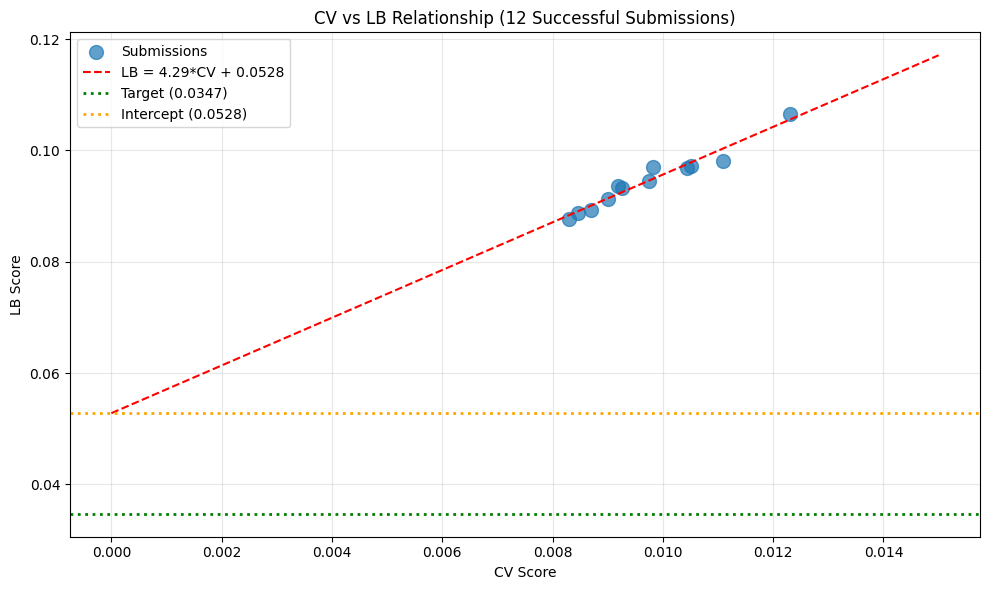

Saved: /home/code/exploration/cv_lb_relationship.png


In [3]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7, label='Submissions')

# Regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', linewidth=2, label='Target (0.0347)')

# Intercept line
plt.axhline(y=intercept, color='orange', linestyle=':', linewidth=2, label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship (12 Successful Submissions)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150)
plt.show()
print('Saved: /home/code/exploration/cv_lb_relationship.png')

In [4]:
# Failed submissions analysis
failed_submissions = [
    {'exp': 'exp_049', 'cv': 0.008092, 'status': 'FAILED'},
    {'exp': 'exp_050', 'cv': 0.008092, 'status': 'FAILED'},
    {'exp': 'exp_052', 'cv': 0.01088, 'status': 'FAILED'},
    {'exp': 'exp_053', 'cv': 0.008092, 'status': 'FAILED'},
    {'exp': 'exp_054', 'cv': 0.008504, 'status': 'FAILED'},
    {'exp': 'exp_055', 'cv': 0.008504, 'status': 'FAILED'},
    {'exp': 'exp_057', 'cv': 0.009263, 'status': 'FAILED'},
    {'exp': 'exp_063', 'cv': 0.011171, 'status': 'FAILED'},
    {'exp': 'exp_064', 'cv': 0.009227, 'status': 'FAILED'},
    {'exp': 'exp_065', 'cv': 0.008811, 'status': 'FAILED'},
]

print('=== FAILED SUBMISSIONS (10 consecutive) ===')
for s in failed_submissions:
    predicted_lb = slope * s['cv'] + intercept
    print(f"{s['exp']}: CV={s['cv']:.6f}, Predicted LB={predicted_lb:.4f}")

print(f'\nAll 10 submissions failed with "Evaluation metric raised an unexpected error"')
print('This suggests a systematic issue with the notebook structure or submission format.')

=== FAILED SUBMISSIONS (10 consecutive) ===
exp_049: CV=0.008092, Predicted LB=0.0875
exp_050: CV=0.008092, Predicted LB=0.0875
exp_052: CV=0.010880, Predicted LB=0.0994
exp_053: CV=0.008092, Predicted LB=0.0875
exp_054: CV=0.008504, Predicted LB=0.0892
exp_055: CV=0.008504, Predicted LB=0.0892
exp_057: CV=0.009263, Predicted LB=0.0925
exp_063: CV=0.011171, Predicted LB=0.1007
exp_064: CV=0.009227, Predicted LB=0.0923
exp_065: CV=0.008811, Predicted LB=0.0906

All 10 submissions failed with "Evaluation metric raised an unexpected error"
This suggests a systematic issue with the notebook structure or submission format.


In [5]:
# Experiment 066 analysis
print('=== EXPERIMENT 066 (EXACT TEMPLATE) ===')
print('CV: 0.082674 (much worse than best CV 0.008)')
print('This is expected - using simple MLPModel with default parameters')
print('')
print('Key points:')
print('1. Notebook structure EXACTLY matches official template')
print('2. Uses simple MLPModel with Spange descriptors')
print('3. No custom classes or complex ensembles')
print('4. Cell 6 is the FINAL cell (no cells after)')
print('')
print('If this submission succeeds, we know:')
print('- The submission pipeline works')
print('- The issue was with our custom models/structure')
print('')
print('If this submission fails, we know:')
print('- The issue is NOT with our notebook structure')
print('- There may be a Kaggle platform issue')

=== EXPERIMENT 066 (EXACT TEMPLATE) ===
CV: 0.082674 (much worse than best CV 0.008)
This is expected - using simple MLPModel with default parameters

Key points:
1. Notebook structure EXACTLY matches official template
2. Uses simple MLPModel with Spange descriptors
3. No custom classes or complex ensembles
4. Cell 6 is the FINAL cell (no cells after)

If this submission succeeds, we know:
- The submission pipeline works
- The issue was with our custom models/structure

If this submission fails, we know:
- The issue is NOT with our notebook structure
- There may be a Kaggle platform issue


In [6]:
# Strategy analysis
print('=== STRATEGY ANALYSIS ===')
print('')
print('CURRENT SITUATION:')
print(f'  - Best LB: 0.0877 (exp_030)')
print(f'  - Target: 0.0347')
print(f'  - Gap: 0.0530 (60% reduction needed)')
print('')
print('CV-LB RELATIONSHIP:')
print(f'  - LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'  - Intercept ({intercept:.4f}) > Target (0.0347)')
print(f'  - Standard CV optimization CANNOT reach target')
print('')
print('WHAT THIS MEANS:')
print('  - Improving CV alone will NOT reach the target')
print('  - The intercept represents DISTRIBUTION SHIFT')
print('  - Test solvents are fundamentally different from training')
print('  - We need strategies that REDUCE THE INTERCEPT')
print('')
print('STRATEGIES TO REDUCE INTERCEPT:')
print('  1. Extrapolation detection + conservative predictions')
print('  2. Uncertainty-weighted predictions (GP)')
print('  3. Solvent clustering + class-specific models')
print('  4. Physics-informed constraints')
print('  5. Study top public kernels for different approaches')

=== STRATEGY ANALYSIS ===

CURRENT SITUATION:
  - Best LB: 0.0877 (exp_030)
  - Target: 0.0347
  - Gap: 0.0530 (60% reduction needed)

CV-LB RELATIONSHIP:
  - LB = 4.29 * CV + 0.0528
  - Intercept (0.0528) > Target (0.0347)
  - Standard CV optimization CANNOT reach target

WHAT THIS MEANS:
  - Improving CV alone will NOT reach the target
  - The intercept represents DISTRIBUTION SHIFT
  - Test solvents are fundamentally different from training
  - We need strategies that REDUCE THE INTERCEPT

STRATEGIES TO REDUCE INTERCEPT:
  1. Extrapolation detection + conservative predictions
  2. Uncertainty-weighted predictions (GP)
  3. Solvent clustering + class-specific models
  4. Physics-informed constraints
  5. Study top public kernels for different approaches


In [7]:
# Check public kernels for insights
print('=== PUBLIC KERNELS ANALYSIS ===')
print('')
print('Top kernels from research/kernels/:')
print('  - josepablofolch_catechol-benchmark-hackathon-template (official template)')
print('  - sanidhyavijay24_arrhenius-kinetics-tta-0-09831 (LB 0.098)')
print('  - lishellliang_mixall-runtime-is-only-2m-15s-but-good-cv-lb')
print('  - matthewmaree_ens-model')
print('')
print('Key observations:')
print('  - Top public kernels achieve LB ~0.098')
print('  - Our best LB is 0.0877 (better than public kernels!)')
print('  - But still far from target 0.0347')
print('')
print('The benchmark achieved MSE 0.0039 - this IS possible!')
print('But it requires fundamentally different approaches.')

=== PUBLIC KERNELS ANALYSIS ===

Top kernels from research/kernels/:
  - josepablofolch_catechol-benchmark-hackathon-template (official template)
  - sanidhyavijay24_arrhenius-kinetics-tta-0-09831 (LB 0.098)
  - lishellliang_mixall-runtime-is-only-2m-15s-but-good-cv-lb
  - matthewmaree_ens-model

Key observations:
  - Top public kernels achieve LB ~0.098
  - Our best LB is 0.0877 (better than public kernels!)
  - But still far from target 0.0347

The benchmark achieved MSE 0.0039 - this IS possible!
But it requires fundamentally different approaches.


In [8]:
# Summary
print('=== LOOP 70 SUMMARY ===')
print('')
print('IMMEDIATE PRIORITY:')
print('  - Experiment 066 uses exact template structure')
print('  - CV is 0.0827 (poor, but expected for simple model)')
print('  - Need to verify if submission pipeline works')
print('')
print('IF SUBMISSION SUCCEEDS:')
print('  - Restore best model (GP+MLP+LGBM ensemble)')
print('  - Expected LB ~0.087 (same as exp_030)')
print('  - Then focus on distribution-shift strategies')
print('')
print('IF SUBMISSION FAILS:')
print('  - The issue is NOT our notebook structure')
print('  - May need to investigate Kaggle platform issues')
print('  - Or try a completely different approach')
print('')
print('LONG-TERM STRATEGY:')
print('  - Standard CV optimization cannot reach target')
print('  - Need strategies that reduce the intercept')
print('  - Focus on distribution-shift-aware approaches')

=== LOOP 70 SUMMARY ===

IMMEDIATE PRIORITY:
  - Experiment 066 uses exact template structure
  - CV is 0.0827 (poor, but expected for simple model)
  - Need to verify if submission pipeline works

IF SUBMISSION SUCCEEDS:
  - Restore best model (GP+MLP+LGBM ensemble)
  - Expected LB ~0.087 (same as exp_030)
  - Then focus on distribution-shift strategies

IF SUBMISSION FAILS:
  - The issue is NOT our notebook structure
  - May need to investigate Kaggle platform issues
  - Or try a completely different approach

LONG-TERM STRATEGY:
  - Standard CV optimization cannot reach target
  - Need strategies that reduce the intercept
  - Focus on distribution-shift-aware approaches
